# Analisis de ventas


In [1]:
import os
import pandas as pd

## consolidar datos de todo el año

In [2]:
path = 'Sales_Data'
archivos = [file for file in os.listdir(path) if not file.startswith('.')]
print(archivos)
data_anual = pd.DataFrame()

for archivo in archivos:
    actual = pd.read_csv(path + '/' + archivo)
    data_anual = pd.concat([data_anual, actual])

data_anual.to_csv('consolidado_2019.csv', index=False)

['Sales_May_2019.csv', 'Sales_October_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_November_2019.csv', 'Sales_March_2019.csv', 'Sales_September_2019.csv', 'Sales_April_2019.csv', 'Sales_February_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_June_2019.csv']


In [ ]:
data_anual.describe()

In [ ]:
data_anual.head()

## Limpieza de los datos

In [3]:
# borrar filas vacias
nan_df = data_anual[data_anual.isna().any(axis=1)]

data_anual = data_anual.dropna(how='all')

In [4]:
nan_df2 = data_anual[data_anual.isna().any(axis=1)]
nan_df2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [5]:
data_anual = data_anual[data_anual['Order Date'].str[0:2] != 'Or']

### convertir datos numericos


In [6]:
data_anual['Quantity Ordered'] = pd.to_numeric(data_anual['Quantity Ordered'])
data_anual['Price Each'] = pd.to_numeric(data_anual['Price Each'])

In [7]:
type(data_anual['Price Each'][0].values[0])

numpy.float64

### agregar columna de mes

In [8]:
data_anual['Month'] = pd.to_numeric(data_anual['Order Date'].str[:2])
data_anual.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5


In [9]:
def get_ciudad(direccion):
    return direccion.split(',')[1].strip(' ')
def get_estado(direccion):
    return direccion.split(',')[2].split(' ')[1]

In [10]:
get_estado('669 2nd St, New York City, NY 10001')

'NY'

In [11]:
data_anual['City'] = data_anual['Purchase Address'].apply(get_ciudad)
data_anual.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,New York City
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,Dallas
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,New York City
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,Dallas
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,Seattle


## Exploracion de datos


### cual fue el mejor mes en ventas

In [12]:
data_anual['Sales'] = data_anual['Quantity Ordered'].astype('int') * data_anual['Price Each'].astype('float')
data_anual.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,New York City,11.99
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,Dallas,3.84
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,New York City,149.99
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,Dallas,11.99
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,Seattle,5.98


In [14]:
data_anual.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


Text(0.5, 0, 'Mes')

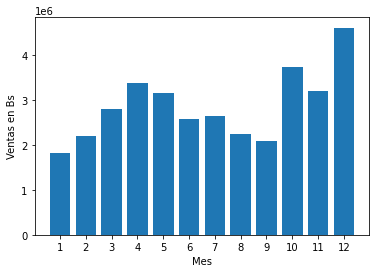

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
months = range(1,13)

plt.bar(months, data_anual.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Ventas en Bs')
plt.xlabel('Mes')


### cual es la ciudad con mas ventas?


In [17]:
data_anual.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta,16602,2.779908e+06,104794,2.795499e+06
Austin,11153,1.809874e+06,69829,1.819582e+06
Boston,22528,3.637410e+06,141112,3.661642e+06
Dallas,16730,2.752628e+06,104620,2.767975e+06
Los Angeles,33289,5.421435e+06,208325,5.452571e+06
New York City,27932,4.635371e+06,175741,4.664317e+06
Portland,14053,2.307747e+06,87765,2.320491e+06
San Francisco,50239,8.211462e+06,315520,8.262204e+06
Seattle,16553,2.733296e+06,104941,2.747755e+06


Text(0.5, 0, 'Ciudad')

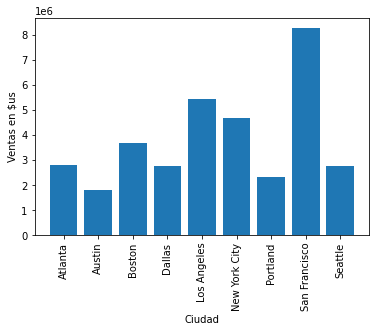

In [20]:
ciudades = [ciudad for ciudad, df in data_anual.groupby(['City'])]
plt.bar(ciudades, data_anual.groupby(['City']).sum()['Sales'])
plt.xticks(ciudades, rotation='vertical')
plt.ylabel('Ventas en $us')
plt.xlabel('Ciudad')

### a que hora deberiamos mostrar publicidad para mejorar nuestras ventas?

In [23]:
data_anual['Hour'] = pd.to_datetime(data_anual['Order Date']).dt.hour
data_anual.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,New York City,11.99,17
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,Dallas,3.84,14
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,New York City,149.99,11
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,Dallas,11.99,20
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,Seattle,5.98,22


In [29]:
data_anual['Count'] = 1
data_anual.head(15)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Count
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,New York City,11.99,17,1
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,Dallas,3.84,14,1
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,New York City,149.99,11,1
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,Dallas,11.99,20,1
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,Seattle,5.98,22,1
5,194100,iPhone,1,700.00,05/10/19 19:44,"81 Jefferson St, San Francisco, CA 94016",5,San Francisco,700.00,19,1
6,194101,USB-C Charging Cable,1,11.95,05/11/19 22:44,"354 Meadow St, Boston, MA 02215",5,Boston,11.95,22,1
7,194102,Lightning Charging Cable,1,14.95,05/07/19 12:49,"166 4th St, Dallas, TX 75001",5,Dallas,14.95,12,1
8,194103,27in FHD Monitor,1,149.99,05/24/19 18:28,"759 Pine St, Seattle, WA 98101",5,Seattle,149.99,18,1
9,194104,Wired Headphones,1,11.99,05/04/19 18:38,"330 1st St, Seattle, WA 98101",5,Seattle,11.99,18,1


In [26]:
data_anual.groupby(['Hour']).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Count
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


Text(0.5, 0, 'Hora')

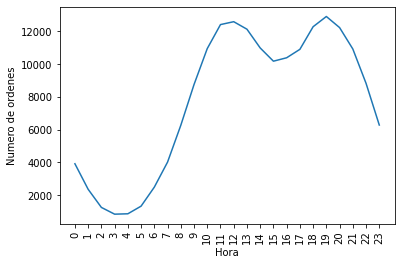

In [28]:
horas = [hora for hora, df in data_anual.groupby(['Hour'])]
plt.plot(horas, data_anual.groupby(['Hour']).count()['Count'])
plt.xticks(horas, rotation='vertical')
plt.ylabel('Numero de ordenes')
plt.xlabel('Hora')

### cuales son los productos que se venden mas a menudo juntos?

In [37]:
df = data_anual[data_anual['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Count,Grouped
15,194110,Google Phone,1,600.00,05/31/19 18:07,"498 14th St, Los Angeles, CA 90001",5,Los Angeles,600.00,18,1,"Google Phone, Wired Headphones"
16,194110,Wired Headphones,1,11.99,05/31/19 18:07,"498 14th St, Los Angeles, CA 90001",5,Los Angeles,11.99,18,1,"Google Phone, Wired Headphones"
77,194170,Google Phone,1,600.00,05/30/19 12:30,"711 Maple St, San Francisco, CA 94016",5,San Francisco,600.00,12,1,"Google Phone, USB-C Charging Cable"
78,194170,USB-C Charging Cable,2,11.95,05/30/19 12:30,"711 Maple St, San Francisco, CA 94016",5,San Francisco,23.90,12,1,"Google Phone, USB-C Charging Cable"
82,194174,iPhone,1,700.00,05/04/19 23:08,"37 North St, Seattle, WA 98101",5,Seattle,700.00,23,1,"iPhone, Lightning Charging Cable, Wired Headph..."


In [38]:
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df2.head()

,Order ID,Grouped
15,194110,"Google Phone, Wired Headphones"
77,194170,"Google Phone, USB-C Charging Cable"
82,194174,"iPhone, Lightning Charging Cable, Wired Headph..."
89,194179,"Flatscreen TV, AAA Batteries (4-pack)"
103,194192,"Wired Headphones, Bose SoundSport Headphones"


In [44]:
from itertools import combinations
from collections import Counter

contador = Counter()

for fila in df2['Grouped']:
    lista_prod = fila.split(',')
    contador.update(Counter(combinations(lista_prod, 2)))

# menos comunes
contador.most_common()[:-50-1:-1]

[((' Bose SoundSport Headphones', ' 27in FHD Monitor'), 1),
 ((' Lightning Charging Cable', ' 34in Ultrawide Monitor'), 1),
 (('LG Dryer', ' Wired Headphones'), 1),
 (('LG Washing Machine', ' iPhone'), 1),
 (('Google Phone', ' 27in 4K Gaming Monitor'), 1),
 (('34in Ultrawide Monitor', ' LG Washing Machine'), 1),
 (('Google Phone', ' Flatscreen TV'), 1),
 ((' Bose SoundSport Headphones', ' 34in Ultrawide Monitor'), 1),
 ((' USB-C Charging Cable', ' 34in Ultrawide Monitor'), 1),
 (('ThinkPad Laptop', ' Vareebadd Phone'), 1),
 (('Macbook Pro Laptop', ' Flatscreen TV'), 1),
 (('LG Dryer', ' Vareebadd Phone'), 1),
 (('20in Monitor', ' iPhone'), 1),
 ((' USB-C Charging Cable', ' Vareebadd Phone'), 1),
 (('Google Phone', ' Vareebadd Phone'), 1),
 ((' Wired Headphones', ' 27in 4K Gaming Monitor'), 1),
 ((' Wired Headphones', ' Google Phone'), 1),
 ((' Apple Airpods Headphones', ' Google Phone'), 1),
 (('LG Washing Machine', ' Wired Headphones'), 1),
 (('LG Washing Machine', ' Google Phone'), 1